# Ex 7c - Face Image Dataset 
We will load a dataset of 5000 faces. Each face is made of a 32 x 32 bits (1024) in grayscale
> This example is very useful to follow this exercise: https://www.kaggle.com/code/mirzarahim/introduction-to-pca-image-compression-example/notebook

In [51]:
# Importing the needed libraries
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We'll use loadmap to load the matlab dataset
from scipy.io import loadmat

# tells matplotlib to embed plots within the notebook
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Loading all data on a dictonary
data = loadmat('ex7faces.mat')

In [3]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [5]:
# Convert the data into a numpy array
X = data['X']

In [9]:
m, n = X.shape

## Visalize 100 images

In [49]:
# We get a 100 random datapoints. First we get a 100 indices out of m
rand_indices = np.random.choice(m, 100, replace=False)
# Second, we load these random vectors in the sel array
sel = X[rand_indices, :]

<function matplotlib.pyplot.show(close=None, block=None)>

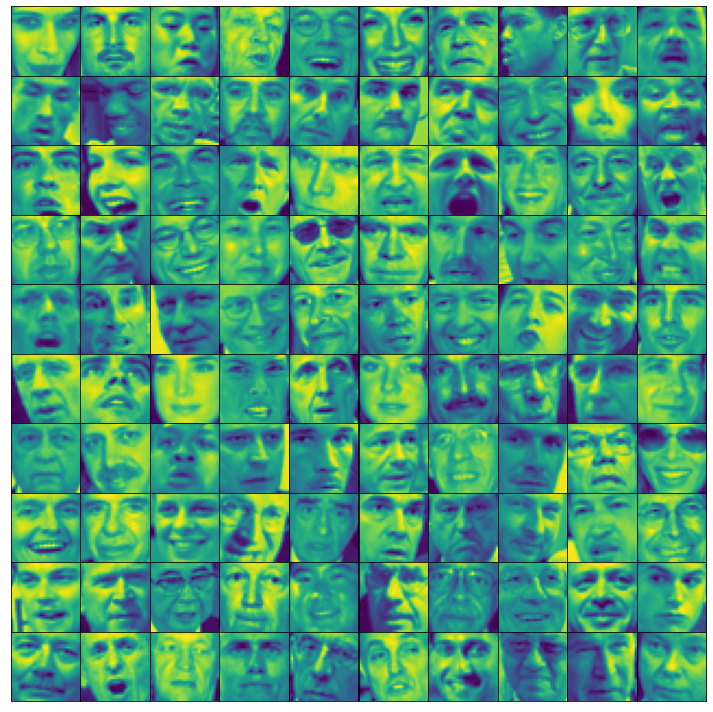

In [50]:
fig, ax = plt.subplots(nrows=10, 
                       ncols=10, 
                       sharex=True, 
                       sharey=True,
                       gridspec_kw = {'wspace':0, 'hspace':0},
                      figsize=(10, 10))
ax = ax.flatten()

for i in range(100):
    img = sel[i].reshape(32,32).T
    ax[i].imshow(img)
    

ax[0].set_xticks([])
ax[0].set_yticks([])
fig.tight_layout()
plt.show

### Dimensionality reduction

In [104]:
# Standardize the data
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)

In [105]:
# cum_var stores the accumulative variance values
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_std)
var_exp = pca.explained_variance_ratio_
cum_var= np.cumsum(var_exp)

<BarContainer object of 1024 artists>

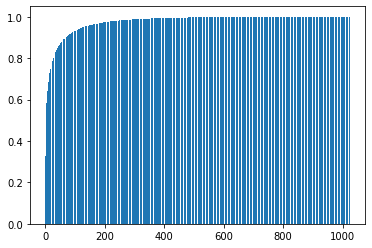

In [106]:
plt.bar(range(var_exp.size), cum_var)

Here we see how a first few components describe most of the model. Let's identify the components that descrive 99% of the model.

In [123]:
# Let's find the first index above 0.99
# We will set this as the number of components in PCA
# because the features up to this index explain most 
# of the model
K= np.searchsorted(cum_var, 0.99)
print('From this index we explain more than 99% of the model: ', K)

From this index we explain more than 99% of the model:  334


In [112]:
K = 36
pca = PCA(n_components=K)
X_pca = pca.fit_transform(X_std)

In [113]:
X_pca.shape

(5000, 36)

Note that in the piece of code below <b>we are recovering the reduced data</b> with <code>pca.inverse_transform</code> and then visualizing it again on a 32 x 32 array

<function matplotlib.pyplot.show(close=None, block=None)>

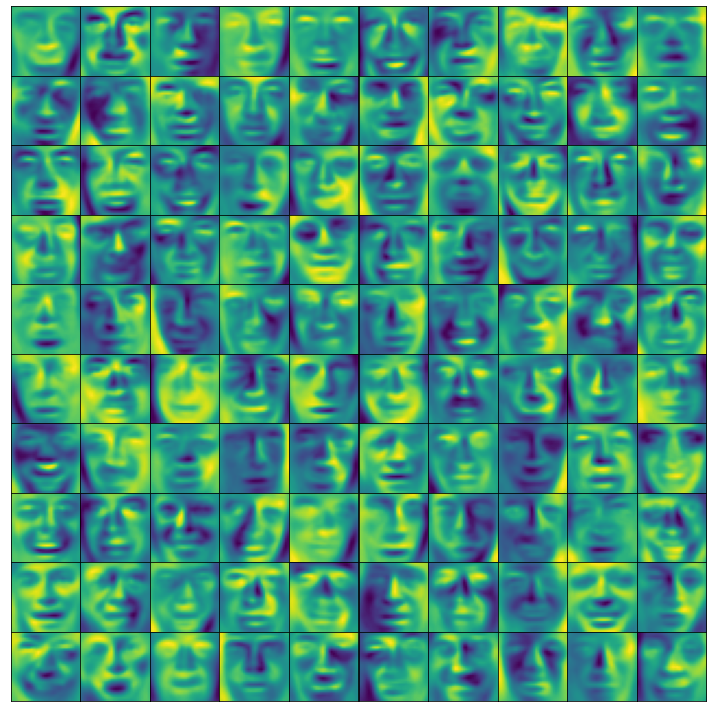

In [114]:
selPca = X_pca[rand_indices, :]
tranSelPca = pca.inverse_transform(selPca)

fig, ax = plt.subplots(nrows=10, 
                       ncols=10, 
                       sharex=True, 
                       sharey=True,
                       gridspec_kw = {'wspace':0, 'hspace':0},
                      figsize=(10,10))
ax = ax.flatten()

for i in range(100):
    img = tranSelPca[i].reshape(32, 32).T
    ax[i].imshow(img)
    

ax[0].set_xticks([])
ax[0].set_yticks([])
fig.tight_layout()
plt.show

We saw before that 99% of the images are explained by 334 components. Representing this we can see that we have a quite decent compression.
<b>We only lose 1% of the image quality with only 30% of the attributes!</b> 

In [134]:
K = 324
pca = PCA(n_components=K)
X_pca = pca.fit_transform(X_std)

In [135]:
print('%d components should explain %f percent of the data' %(K, cum_var[K]*100))

324 components should explain 98.933173 percent of the data


<function matplotlib.pyplot.show(close=None, block=None)>

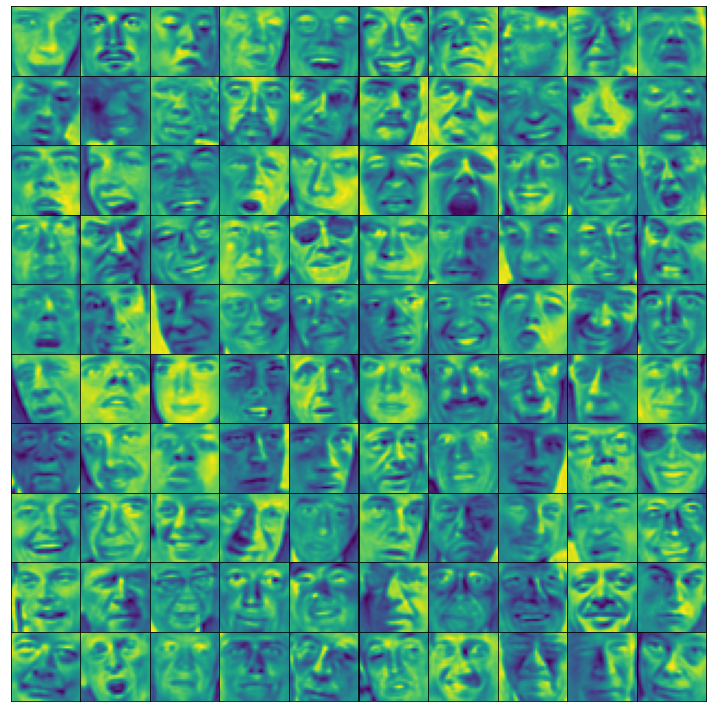

In [117]:
selPca = X_pca[rand_indices, :]
tranSelPca = pca.inverse_transform(selPca)

fig, ax = plt.subplots(nrows=10, 
                       ncols=10, 
                       sharex=True, 
                       sharey=True,
                       gridspec_kw = {'wspace':0, 'hspace':0},
                      figsize=(10,10))
ax = ax.flatten()

for i in range(100):
    img = tranSelPca[i].reshape(32, 32).T
    ax[i].imshow(img)
    

ax[0].set_xticks([])
ax[0].set_yticks([])
fig.tight_layout()
plt.show

To conclude, let's do the same with only 100 attributes.

In [132]:
K = 100
print('%d components should explain %f percent of the data' %(K, cum_var[K]*100))

100 components should explain 93.268263 percent of the data


<function matplotlib.pyplot.show(close=None, block=None)>

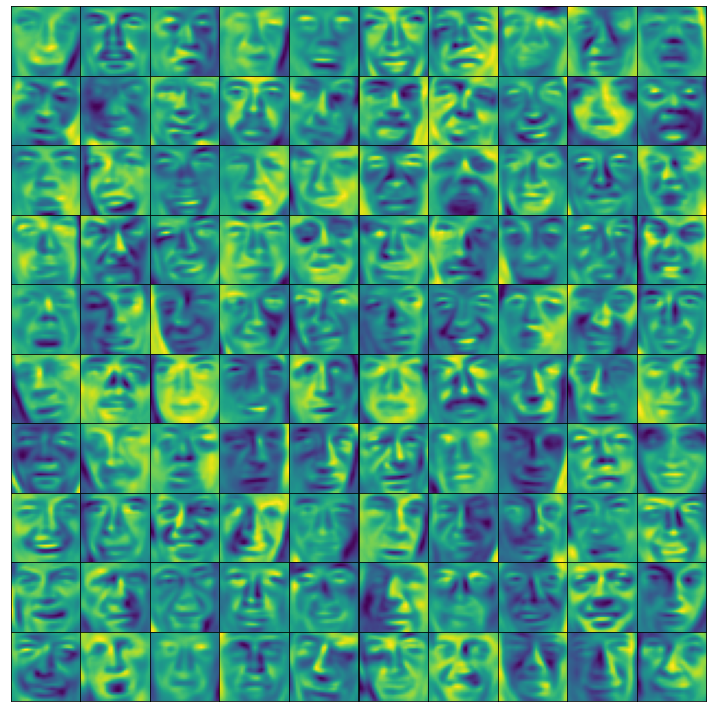

In [133]:
pca = PCA(n_components=K)
X_pca = pca.fit_transform(X_std)

selPca = X_pca[rand_indices, :]
tranSelPca = pca.inverse_transform(selPca)

fig, ax = plt.subplots(nrows=10, 
                       ncols=10, 
                       sharex=True, 
                       sharey=True,
                       gridspec_kw = {'wspace':0, 'hspace':0},
                      figsize=(10,10))
ax = ax.flatten()

for i in range(100):
    img = tranSelPca[i].reshape(32, 32).T
    ax[i].imshow(img)
    

ax[0].set_xticks([])
ax[0].set_yticks([])
fig.tight_layout()
plt.show